## Options 

An option is a financial derivative that gives the holder the right, but not the obligation, to buy or sell an underlying asset at a predetermined price on or before a specified date.

- Call Option: Gives the holder the right to buy an underlying asset at a specified price within a specified time period.
- Put Option: Gives the holder the right to sell an underlying asset at a specified price within a specified time period.

### Import Libraries

In [17]:
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [24]:
# underlying stock price
S = 45.0
# series of underlying stock prices to demonstrate a payoff profile
S_ = np.arange(35.0, 55.0, 0.01) # strike price
K = 45.0
# time to expiration
t = 164.0 / 365.0
# risk free rate
r = 0.02
# volatility
vol = 0.25
# black scholes prices for demonstrating trades
atm_call_premium = 3.20 
atm_put_premium = 2.79
otm_call_premium = 1.39 
otm_put_premium = 0.92

call_payoff = lambda S, K: np.maximum(S_ - K, 0.0)
put_payoff = lambda S, K: np.maximum(K - S_, 0.0)

### Call Option
The payoff of a call option at expiration is calculated as:
 
$\text{Payoff} = \max(S_T - K, 0)$ 

where $S_T$ is the price of the underlying asset at expiration, and $K$ is the strike price of the option.

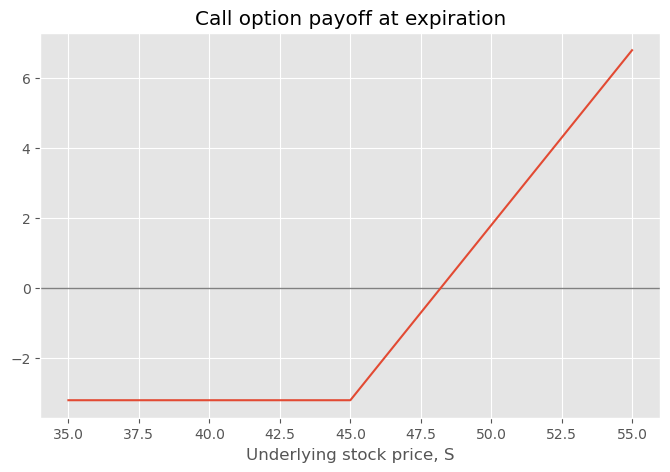

In [19]:
# plot the call payoff
plt.figure(1, figsize=(8, 5))
plt.title("Call option payoff at expiration") 
plt.xlabel("Underlying stock price, S") 
plt.axhline(y=0, lw=1, c="grey")
plt.plot(S_, -atm_call_premium + call_payoff(S_, K))

### Put Option
The payoff of a put option at expiration is calculated as:
 
$\text{Payoff} = \max(K - S_T, 0)$


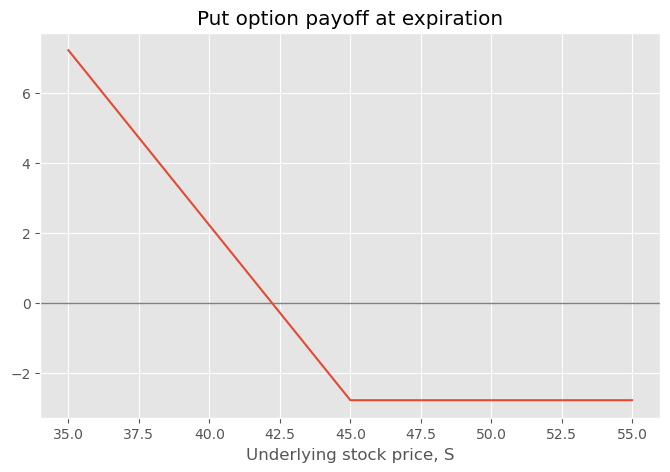

In [20]:
# plot the put payoff
plt.figure(2, figsize=(8, 5))
plt.title("Put option payoff at expiration") 
plt.xlabel("Underlying stock price, S") 
plt.axhline(y=0, lw=1, c="grey")
plt.plot(S_, -atm_put_premium + put_payoff(S_, K))

### Long Straddle
A long straddle involves buying both a call option and a put option with the same strike price and expiration date. The payoff of a long straddle at expiration is:
 
$\text{Payoff} = \max(0, S_T - K) + \max(0, K - S_T)$

This strategy profits if the underlying asset’s price moves significantly in either direction, either up or down.

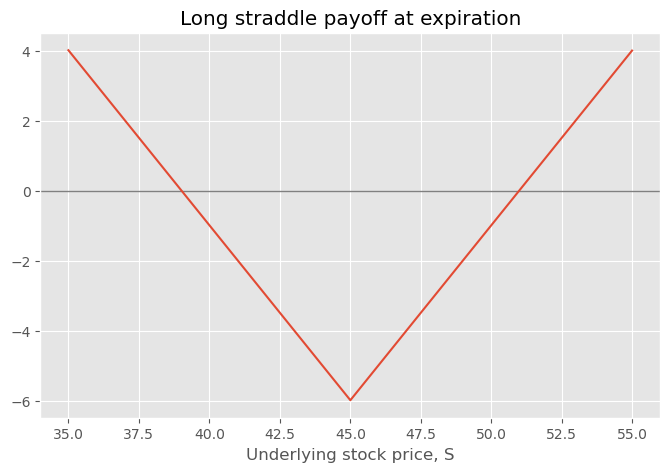

In [25]:
# plot a long straddle payoff
long_straddle = call_payoff(S_, K) + put_payoff(S_, K) 
long_straddle_premium = -atm_call_premium - atm_put_premium 
plt.figure(3, figsize=(8, 5))
plt.title("Long straddle payoff at expiration") 
plt.xlabel("Underlying stock price, S")
plt.axhline(y=0, lw=1, c="grey")
plt.plot(S_, long_straddle_premium + long_straddle)

### Short Straddle
A short straddle involves selling both a call option and a put option with the same strike price and expiration date. The payoff of a short straddle at expiration is:
 
$\text{Payoff} = -\max(0, S_T - K) - \max(0, K - S_T)$

This strategy profits if the underlying asset’s price remains relatively stable around the strike price, as it benefits from the premiums received from selling the options.

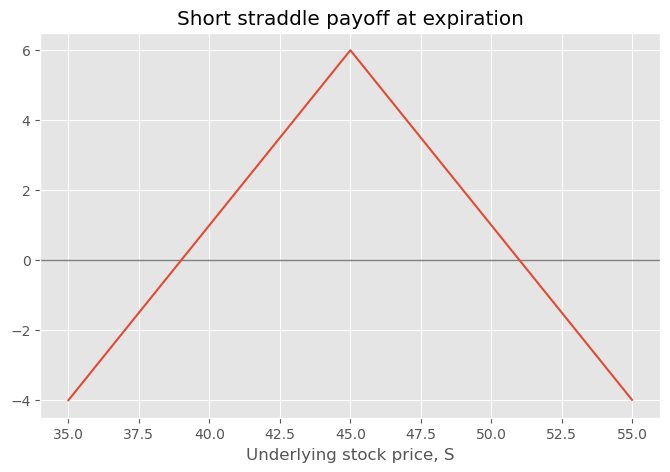

In [26]:
# plot a short straddle payoff
short_straddle = -call_payoff(S_, K) - put_payoff(S_, K) 
short_straddle_premium = atm_call_premium + atm_put_premium 
plt.figure(4, figsize=(8, 5))
plt.title("Short straddle payoff at expiration")
plt.xlabel("Underlying stock price, S")
plt.axhline(y=0, lw=1, c="grey")
plt.plot(S_, short_straddle_premium - long_straddle)

### Iron Condor

The payoff of an iron condor at expiration can be broken down into different scenarios:

1. When the underlying asset’s price is between the two middle strike prices (K2 and K3):

$\text{Payoff} = \text{Net Premium Received}$

2. When the underlying asset’s price is below the lowest strike price (K1):
 
$\text{Payoff} = \text{Net Premium Received} - (K2 - K1)$

3. When the underlying asset’s price is above the highest strike price (K4):

$\text{Payoff} = \text{Net Premium Received} - (K4 - K3)$

4. When the underlying asset’s price is between the lowest strike price (K1) and the second lowest strike price (K2):

$\text{Payoff} = \text{Net Premium Received} - (K2 - S_T)$

5. When the underlying asset’s price is between the second highest strike price (K3) and the highest strike price (K4):

$\text{Payoff} = \text{Net Premium Received} - (S_T - K3)$

In summary, the maximum profit is the net premium received, which occurs when the underlying asset’s price stays between the middle strike prices (K2 and K3). The maximum loss is limited to the difference between the strike prices of the spreads minus the net premium received, and it occurs if the underlying asset’s price moves outside the outer strike prices (K1 or K4).

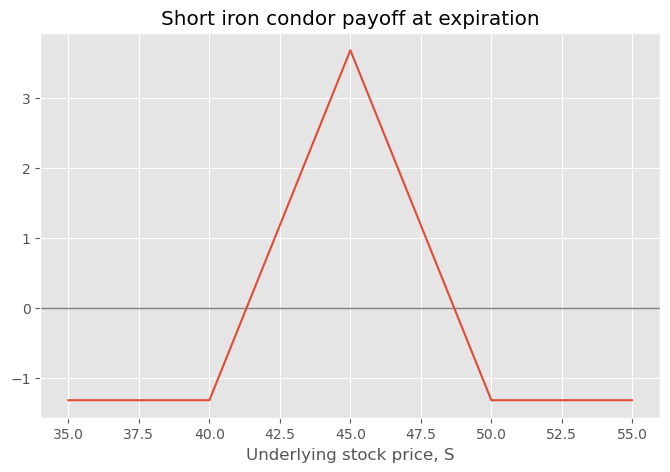

In [23]:
# plot a short iron condor payoff
short_iron_condor = ( call_payoff(S_, K + 5) - call_payoff(S_, K) - put_payoff(S_, K) + put_payoff(S_, K - 5))
short_iron_condor_premium = ( -otm_call_premium + atm_call_premium + atm_put_premium - otm_put_premium )
plt.figure(5, figsize=(8, 5))
plt.title("Short iron condor payoff at expiration") 
plt.xlabel("Underlying stock price, S")
plt.axhline(y=0, lw=1, c="grey")
plt.plot(S_, short_iron_condor_premium + short_iron_condor)